In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')


In [27]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.columns = [col.replace(' ','_') for col in data.columns]
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
data.iloc[:,:-1]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99
996,male,group C,high school,free/reduced,none,62,55
997,female,group C,high school,free/reduced,completed,59,71
998,female,group D,some college,standard,completed,68,78


In [32]:

df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Vertical stack using pandas
result = pd.concat([df1, df2], axis=1, ignore_index=True)
print(result)

   0  1  2  3
0  1  3  5  7
1  2  4  6  8


In [4]:
# main aim of the project is to predict the student maths exam score using input features

input_data = data.drop(columns=['math_score'])
target = data['math_score']


In [5]:
input_data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
input_data.dtypes

gender                         object
race/ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
reading_score                   int64
writing_score                   int64
dtype: object

In [7]:
input_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
input_data[input_data.duplicated()]
#Not treating this as these are not duplicate records

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
445,female,group C,some high school,standard,completed,74,77
555,female,group C,some college,free/reduced,none,39,33
713,male,group D,master's degree,standard,none,81,84
957,female,group D,master's degree,standard,none,100,100


### univariant analysis

In [9]:
numerical_columns = input_data.select_dtypes(exclude='object').columns
categorical_columns = input_data.select_dtypes(include = 'object').columns

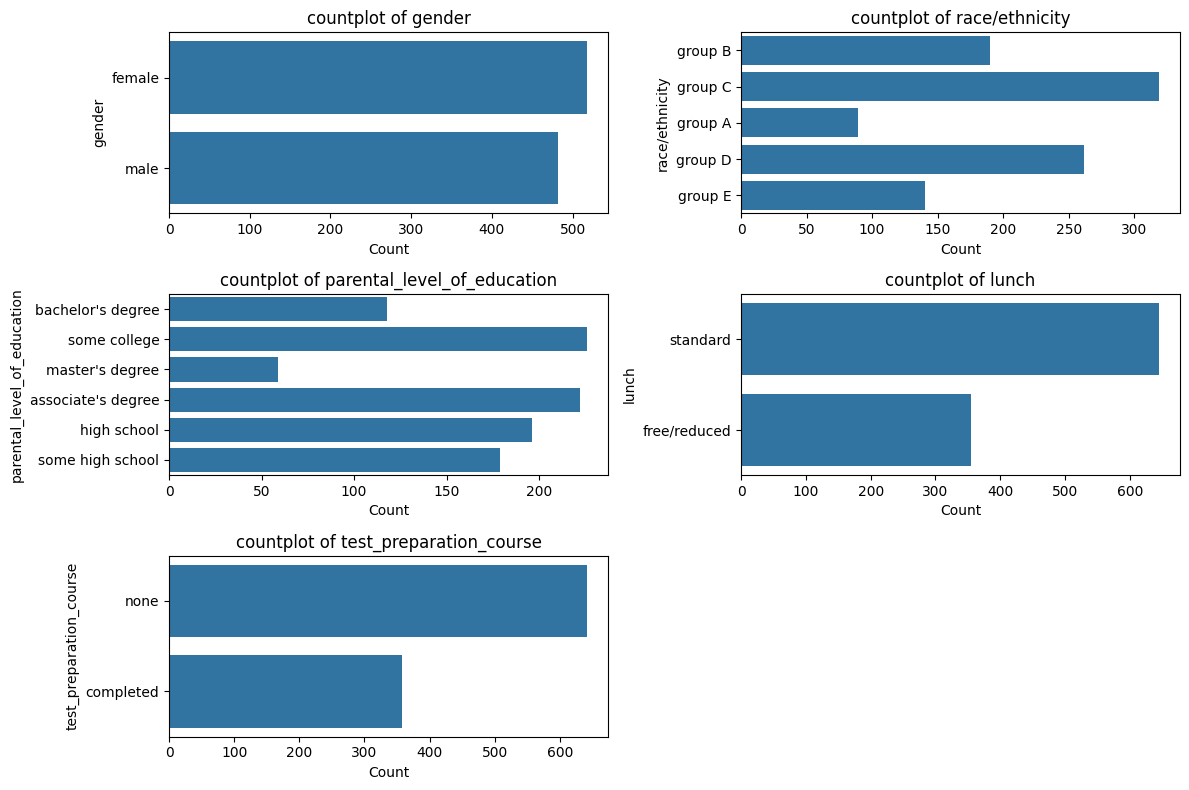

In [10]:
n = len(input_data[categorical_columns].columns)
cols = 2
rows = math.ceil(n/cols)

fig,axes = plt.subplots(rows,cols,figsize = (12,8))

axes = axes.flatten()

for i, col in enumerate(input_data[categorical_columns].columns):
    sns.countplot(input_data[col], ax=axes[i])
    axes[i].set_title(f'countplot of {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()





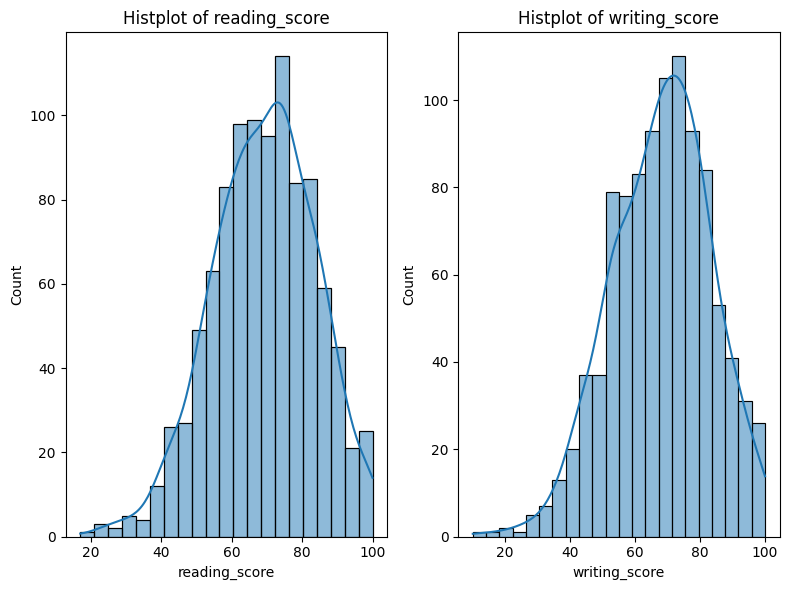

In [11]:
n = len(input_data[numerical_columns].columns)
cols = 2
rows = math.ceil(n/cols)

fig,axes = plt.subplots(rows,cols,figsize = (8,6))

axes = axes.flatten()

for i, col in enumerate(input_data[numerical_columns].columns):
    sns.histplot(input_data[col], ax=axes[i],kde=True)
    axes[i].set_title(f'Histplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()





## Bi-variant analysis

In [12]:
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


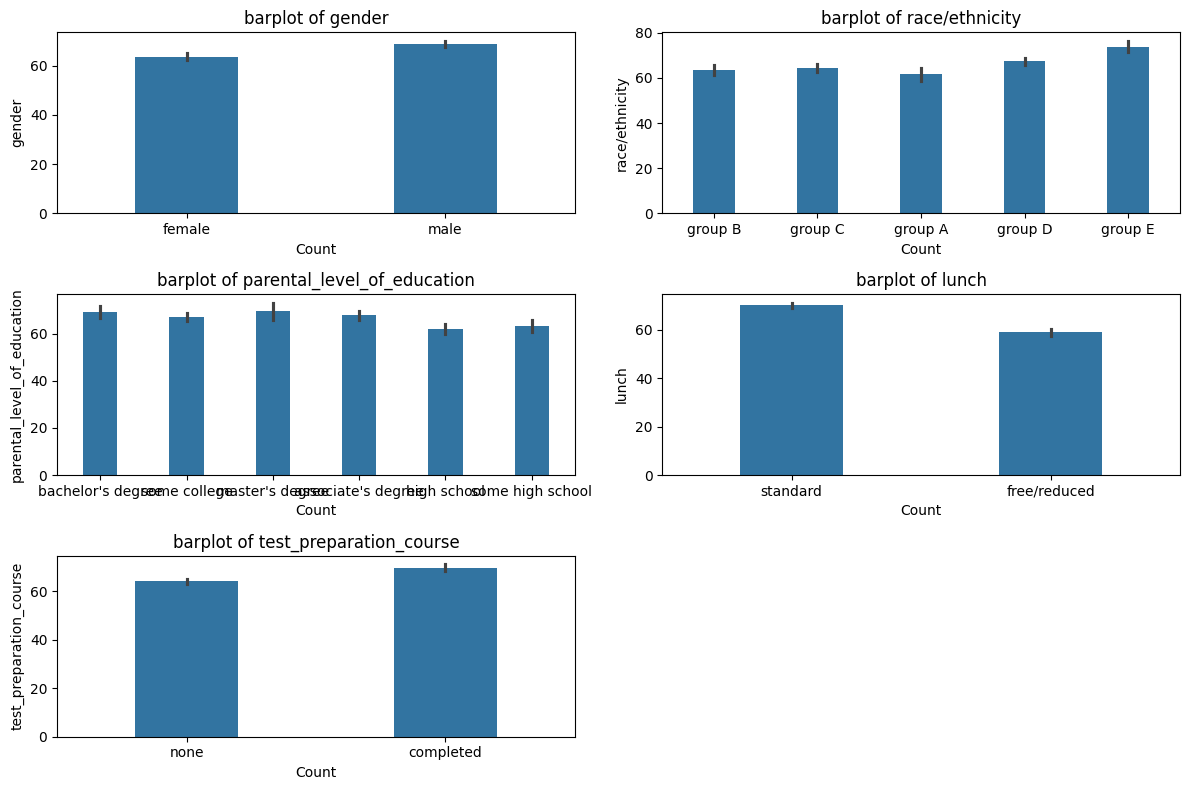

In [13]:
n = len(input_data[categorical_columns].columns)
cols = 2
rows = math.ceil(n/cols)

fig,axes = plt.subplots(rows,cols,figsize = (12,8))

axes = axes.flatten()

for i, col in enumerate(data.select_dtypes(include='object').columns):
    sns.barplot(data=data,x=data[col],y=data['math_score'],ax=axes[i],width=0.4,dodge='auto')
    axes[i].set_title(f'barplot of {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()





In [14]:
from sklearn.model_selection import train_test_split
from EDA_utils import DegreeTransformation

In [15]:
X = input_data
y = target

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [17]:
x_train.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
253,male,group D,master's degree,standard,none,80,72
667,female,group B,bachelor's degree,free/reduced,none,85,87
85,female,group C,some college,standard,none,80,82
969,female,group B,bachelor's degree,standard,none,84,80
75,male,group B,associate's degree,free/reduced,none,41,38


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [19]:
numerical_cols = ['reading_score', 'writing_score']
nominal_cols = ['gender', 'race/ethnicity','lunch']
ordinal_cols = ['test_preparation_course']

In [20]:
test_preparation_course_categories = ['none', 'completed']

In [21]:

degree_transformer = DegreeTransformation('parental_level_of_education')
degree_encoder = OrdinalEncoder(categories=[['high_school', 'associate', 'bachelors', 'masters', 'phd']])


numerical_transformer  = StandardScaler()
nominal_transformer = OneHotEncoder(handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder(categories=[test_preparation_course_categories])

In [22]:
degree_pipeline = Pipeline([
    ('degree_norm', degree_transformer),
    ('degree_encode', degree_encoder)
])

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('degree', degree_pipeline, ['parental_level_of_education']),
        ('num', numerical_transformer, numerical_cols),
        ('nom', nominal_transformer, nominal_cols),
        ('ord', ordinal_transformer, ordinal_cols)
    ],
    remainder='passthrough'
)

In [25]:
preprocessor.fit(x_train)
X_transformed = preprocessor.transform(x_train)
feature_names = preprocessor.get_feature_names_out()
import pandas as pd
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

ValueError: input_features is not equal to feature_names_in_